In [153]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
import pickle
warnings.filterwarnings('ignore', category=FutureWarning)


In [154]:
data = pd.read_csv('./Dataset_B_hotel.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Untuk mendapatkan info data type dari setiap kolom

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Dataset Description
a. Booking_ID = Pengenal unik dari tiap pemesanan

b. no_of_adults = Jumlah orang dewasa

c. no_of_children = Jumlah anak kecil

d. no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau
memesan untuk menginap di hotel

e. no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau
memesan untuk menginap di hotel

f. type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan

g. required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1-
Ya)

h. room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh
INN Hotels

i. lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan

j. arrival_year = Tahun tanggal kedatangan

k. arrival_month = Bulan tanggal kedatangan

l. arrival_date = Tanggal kedatangan

m. market_segment_type = Penunjukan segmen pasar

n. repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan
juga menginap? (0 - Tidak, 1- Ya)

o. no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan
sebelum pemesanan saat ini

p. no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan
oleh pelanggan sebelum pemesanan saat ini

q. avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam
euro)

r. no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya
lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)

s. booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.

Dari sini kita bisa melihat klau misalnya booking statusnya itu adalah target variable (y) yang harus diprediksi

# Data Cleaning

In [156]:
print ("Missing Values : ")
null_count = data.isnull().sum()
null_percentage = (null_count / len(data)) * 100

null_summary = pd.DataFrame({
    'Jumlah Null': null_count,
    'Persen (%)': null_percentage.round(2)
})

print(null_summary)
print ("------------------------------")
print ("Duplicate Values : " + str(data.duplicated().sum()))
print ("------------------------------")

Missing Values : 
                                      Jumlah Null  Persen (%)
Booking_ID                                      0         0.0
no_of_adults                                    0         0.0
no_of_children                                  0         0.0
no_of_weekend_nights                            0         0.0
no_of_week_nights                               0         0.0
type_of_meal_plan                             907         2.5
required_car_parking_space                   1270         3.5
room_type_reserved                              0         0.0
lead_time                                       0         0.0
arrival_year                                    0         0.0
arrival_month                                   0         0.0
arrival_date                                    0         0.0
market_segment_type                             0         0.0
repeated_guest                                  0         0.0
no_of_previous_cancellations                    0   

In [157]:
print("Data Anomaly")
print ("------------------------------")
for column in data.columns:
    print(f"{column} : {data[column].unique()[:25]}")
print ("------------------------------")

Data Anomaly
------------------------------
Booking_ID : ['INN00001' 'INN00002' 'INN00003' 'INN00004' 'INN00005' 'INN00006'
 'INN00007' 'INN00008' 'INN00009' 'INN00010' 'INN00011' 'INN00012'
 'INN00013' 'INN00014' 'INN00015' 'INN00016' 'INN00017' 'INN00018'
 'INN00019' 'INN00020' 'INN00021' 'INN00022' 'INN00023' 'INN00024'
 'INN00025']
no_of_adults : [2 1 3 0 4]
no_of_children : [ 0  2  1  3 10  9]
no_of_weekend_nights : [1 2 0 4 3 6 5 7]
no_of_week_nights : [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' nan 'Meal Plan 3']
required_car_parking_space : [ 0. nan  1.]
room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time : [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3]
arrival_year : [2017 2018]
arrival_month : [10 11  2  5  4  9 12  7  6  8  3  1]
arrival_date : [ 2  6 28 20 11 13 15 

# Missing Value
Disini terdapat missing value untuk : 
- type_of_meal_plan : 907 (2.5%)
- required_car_parking_space : 1270 (3.5%)
- avg_price_per_room : 1632 (4.5%)

walauapun angka missing valuenya terliht tinggi namun persetanse missing valuenya itu rendah maka dari itu kita ga bisa langsung drop valuenya. Tapi disini saya akan mengimpute dengan mean / median / modus.

- type_of_meal_plan dan required_car_parking_space adalah kategorikal jadi kita impute dengan modus 
- avg_price_per_room adalah numeric  jadi kita impute dengan mean / median.

untuk menentukan mean / median kt harus melihat distribusi dari tiap kolom dlu.
- Jika distribusi normal : pakai mean
- Jika distribusi tidak normal : pakai median

# Drop ID
Disini kita akan drop Booking_ID karena role dia disini hanya sebagai identifikasi / unique ID di dataset tersebut dimana kolom ini tidak memiliki hubungan dengan target variable kita sama sekali.

# Anomaly Data
Tidak ada data yang anomali selain missing value 

In [158]:
# Drop Kolom Booking ID
data = data.drop(columns=["Booking_ID"])

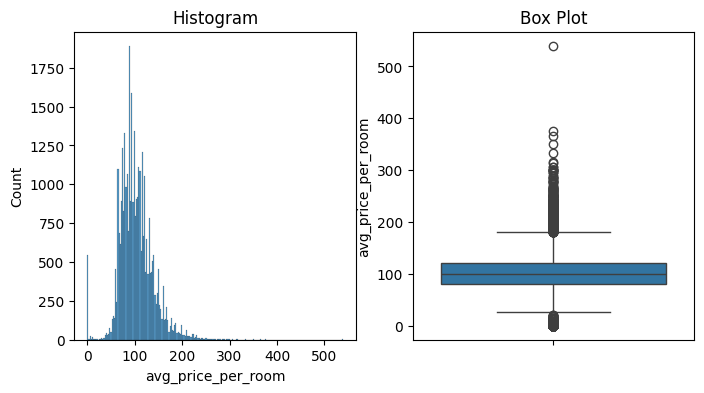

avg_price_per_room
Skewness :  0.6654046613647858
Kurtosis :  3.1957401487168973


In [159]:
def check_distribution(data,columns):
  for column in columns:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(data[column])
    plt.title('Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(data[column])
    plt.title('Box Plot')
    plt.show()
    print(column)
    print("Skewness : ", data[column].skew())
    print("Kurtosis : ", data[column].kurt())

check_distribution(data,["avg_price_per_room"])

Skewness menunjukkan sejauh mana distribusi data tidak simetris.
- Jika skewness mendekati 0, distribusi cenderung simetris (normal).
- Jika skewness lebih besar dari 0, distribusi miring ke kanan (positif skew)
- Jika skewness lebih kecil dari 0, distribusi miring ke kiri (negatif skew)

Kurtosis menunjukkan sejauh mana distribusi memiliki puncak yang tajam atau datar dibandingkan distribusi normal.
- Kurtosis normal adalah sekitar 3
- Jika kurtosis lebih besar dari 3, distribusi lebih tajam
- Jika kurtosis lebih kecil dari 3, distribusi lebih datar

Kalau salah satu menunjukkan tidak normal , maka distribusi tersebut tidak normal.

Disini kita bisa lihat kalaua distribusinya itu condong ke kanan dan di boxplot banyak outlier di bagian atas, yang menunjukkan kalau distribusnya itu tidak normal
Berdasarkan skewness > 0.5 dan kurtosis > 3-> ini juga menunjukkna distribusi tidak normal.
Jadi kita impute dengan median

Sebelum kita melakukan impputasi , kita akan split data menjadi train: test (80:20) karena kita akan mengambl median dan modus dari train data saja kemudian mengimpute null value

In [160]:
x = data.drop(columns=["booking_status"])
y = data["booking_status"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [161]:
avg_price_per_room_imputation = x_train["avg_price_per_room"].median()
required_car_parking_space_imputation = x_train["required_car_parking_space"].mode()[0]
type_of_meal_plan_imputation = x_train["type_of_meal_plan"].mode()[0]

x_train['avg_price_per_room'] = x_train['avg_price_per_room'].fillna(avg_price_per_room_imputation)
x_test['avg_price_per_room'] = x_test['avg_price_per_room'].fillna(avg_price_per_room_imputation)

x_train['required_car_parking_space'] = x_train['required_car_parking_space'].fillna(required_car_parking_space_imputation)
x_test['required_car_parking_space'] = x_test['required_car_parking_space'].fillna(required_car_parking_space_imputation)

x_train['type_of_meal_plan'] = x_train['type_of_meal_plan'].fillna(type_of_meal_plan_imputation)
x_test['type_of_meal_plan'] = x_test['type_of_meal_plan'].fillna(type_of_meal_plan_imputation)

# EDA

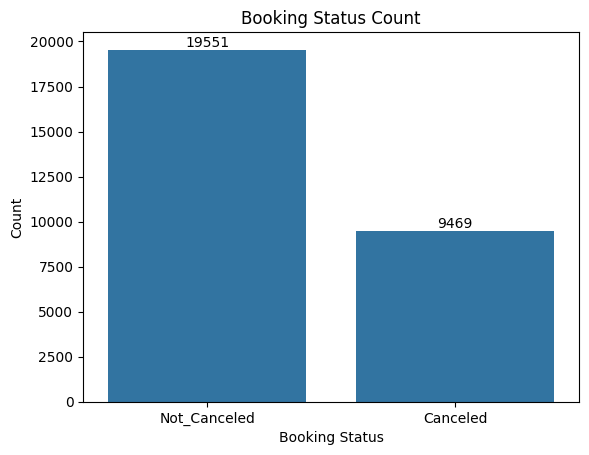

In [162]:
ax = sns.countplot(x='booking_status', data=pd.DataFrame(y_train, columns=['booking_status']))
plt.title('Booking Status Count')
plt.xlabel('Booking Status')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   
        height + 1,                      
        f'{int(height)}',
        ha='center', va='bottom'
    )
plt.show()

Dari plot diatas, kita bisa melihat data Not Canceled memiliki 2x data dari data Canceled. Mungkin model kita dapat lebih memahami fitur Not Cancelled drpd Canceled. 

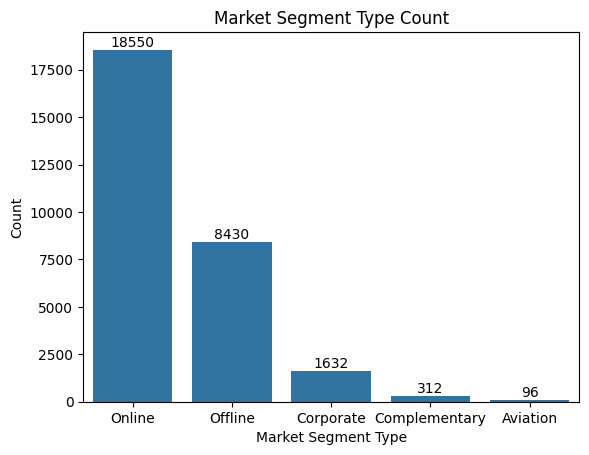

In [163]:
ax = sns.countplot(x='market_segment_type', data=x_train)
plt.title('Market Segment Type Count')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   
        height + 1,                      
        f'{int(height)}',
        ha='center', va='bottom'
    )
plt.show()

Kebanyakan data di dataset tersbut memiliki market segment type Onlien yang artinya kebanyakan orang booking online hotel untuk efisiensi customer.

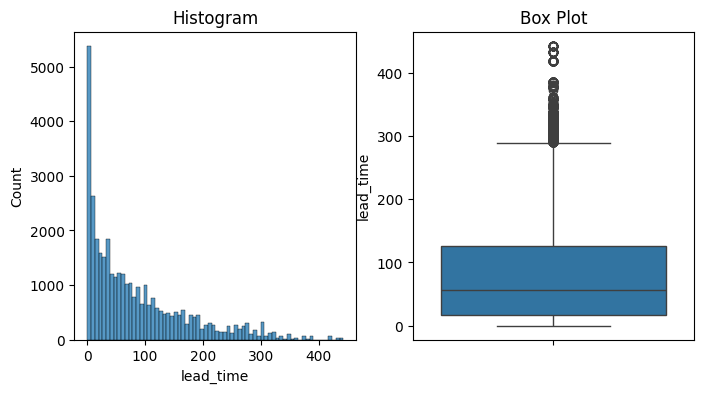

lead_time
Skewness :  1.2924915330710838
Kurtosis :  1.1795940897790458


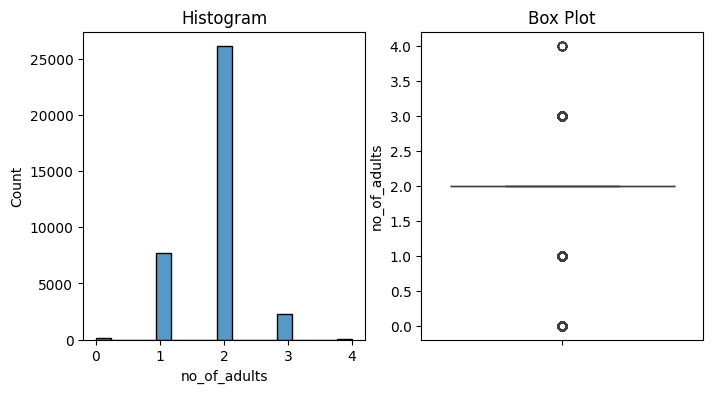

no_of_adults
Skewness :  -0.3332949302307013
Kurtosis :  0.8148219649541883


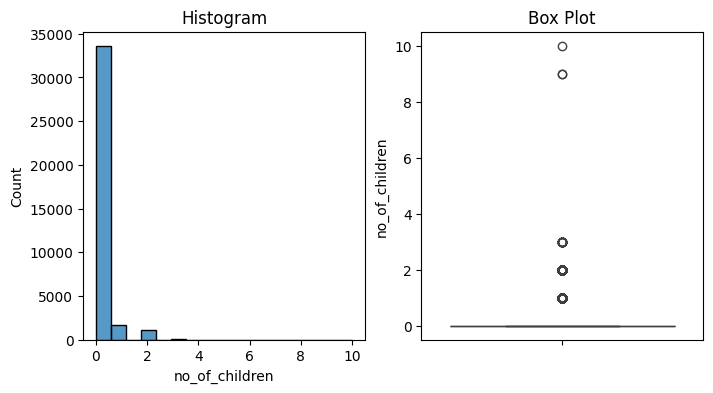

no_of_children
Skewness :  4.710349518506961
Kurtosis :  36.98185590119308


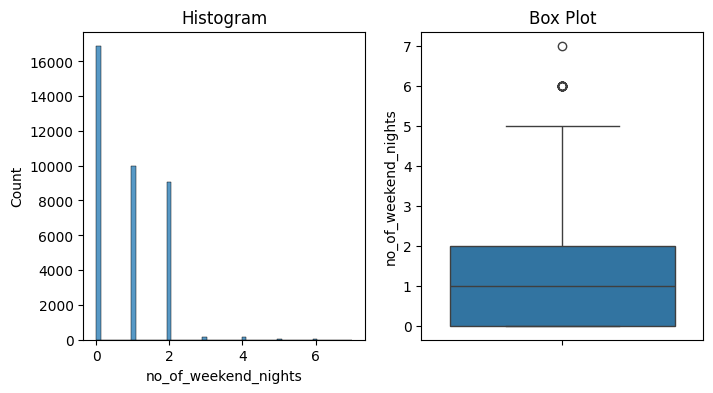

no_of_weekend_nights
Skewness :  0.7376159576059308
Kurtosis :  0.2988575627243817


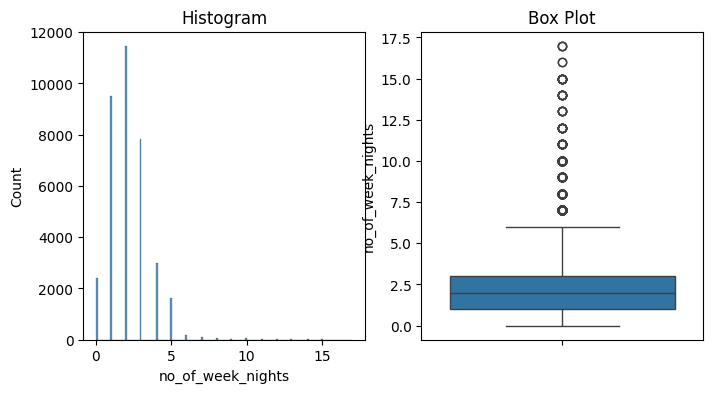

no_of_week_nights
Skewness :  1.5993503651924639
Kurtosis :  7.798283949094243


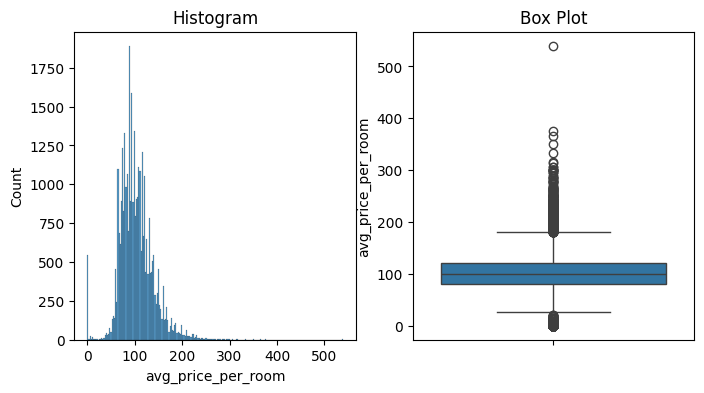

avg_price_per_room
Skewness :  0.6654046613647858
Kurtosis :  3.1957401487168973


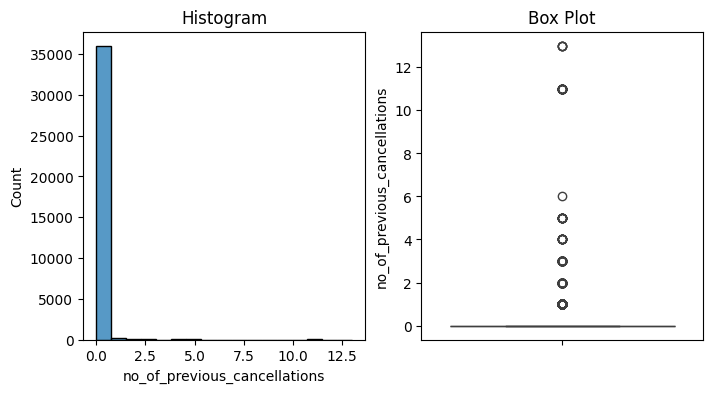

no_of_previous_cancellations
Skewness :  25.199875952075615
Kurtosis :  732.7356755507192


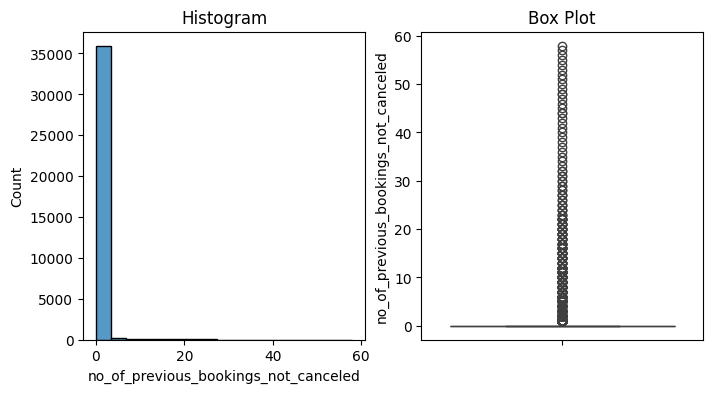

no_of_previous_bookings_not_canceled
Skewness :  19.250190677395846
Kurtosis :  457.3800851716296


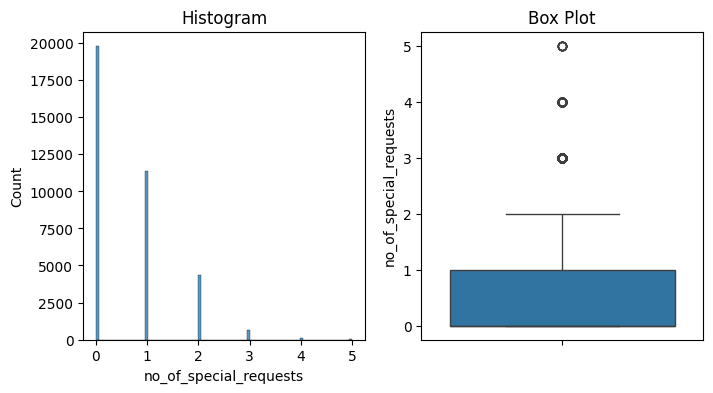

no_of_special_requests
Skewness :  1.145080771394943
Kurtosis :  0.8814370153528488


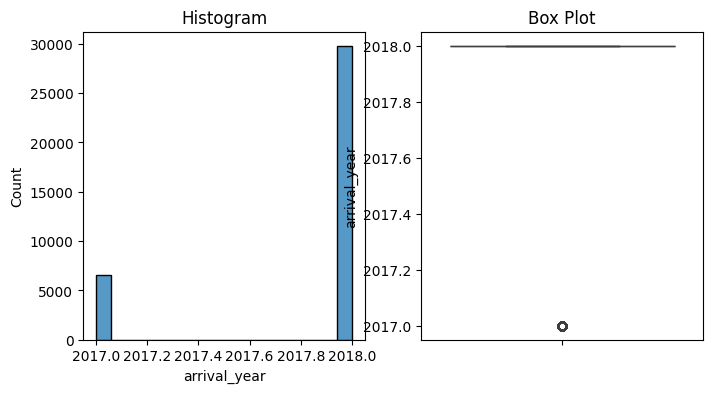

arrival_year
Skewness :  -1.6696953495540467
Kurtosis :  0.787925999101224


In [164]:
num_cols = ['lead_time', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
            'no_of_week_nights', 'avg_price_per_room', 'no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled', 'no_of_special_requests','arrival_year']
check_distribution(data,num_cols)


# Encoding

Dapat dilihat bahwa semua datanya itu distribusinya tidak normal berdasakran plot, skewness dan kurtosisnya.
Oleh karena itu, kita memakai robust scaler karena scaler ini dapat kurangi pengaruh outlier karena dia skalain data by median dan IQR.

In [165]:
scaler = RobustScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [166]:
ohe_encoder = {}
def one_hot_encode_column(train_df, test_df, column):
    ohe_encoder[column] = OneHotEncoder(sparse_output=False)

    train_encoded = ohe_encoder[column].fit_transform(train_df[[column]])
    test_encoded = ohe_encoder[column].transform(test_df[[column]])

    col_names = [f'{column}_{cat}' for cat in ohe_encoder[column].categories_[0]]

    train_ohe_df = pd.DataFrame(train_encoded, columns=col_names, index=train_df.index)
    test_ohe_df = pd.DataFrame(test_encoded, columns=col_names, index=test_df.index)

    train_df = pd.concat([train_df.drop(columns=[column]), train_ohe_df], axis=1)
    test_df = pd.concat([test_df.drop(columns=[column]), test_ohe_df], axis=1)

    return train_df, test_df

categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

for col in categorical_columns:
    x_train, x_test = one_hot_encode_column(x_train, x_test, col)

Disini kita mau solve untuk masalah data cycle dimana januari (1) dan desember (12) itu secara angka jauh , tapi kalo waktu itu cuma beda 1 bulan . dimana model itu ga bs mendeteksi hubungan ini makany kta ubah nilainya ke bentuk sudut dalam lingkaran

In [167]:
x_train['arrival_date_sin'] = np.sin(2 * np.pi * x_train['arrival_date'] / 31)
x_train['arrival_date_cos'] = np.cos(2 * np.pi * x_train['arrival_date'] / 31)
x_train['arrival_month_sin'] = np.sin(2 * np.pi * x_train['arrival_month'] / 12)
x_train['arrival_month_cos'] = np.cos(2 * np.pi * x_train['arrival_month'] / 12)

x_test['arrival_date_sin'] = np.sin(2 * np.pi * x_test['arrival_date'] / 31)
x_test['arrival_date_cos'] = np.cos(2 * np.pi * x_test['arrival_date'] / 31)
x_test['arrival_month_sin'] = np.sin(2 * np.pi * x_test['arrival_month'] / 12)
x_test['arrival_month_cos'] = np.cos(2 * np.pi * x_test['arrival_month'] / 12)

x_test = x_test.drop(columns=['arrival_date', 'arrival_month'])
x_train = x_train.drop(columns=['arrival_date', 'arrival_month'])


Disini untuk booking status kta menggunakan Label Encoder karena itu binary antara Cancelled dan Not Cancelled 0/1

In [168]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [169]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,arrival_date_sin,arrival_date_cos,arrival_month_sin,arrival_month_cos
25629,0.0,1.0,0.5,-0.5,0.0,-0.290909,-1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.299363,-0.954139,-8.660254e-01,5.000000e-01
14473,0.0,1.0,0.0,-0.5,0.0,0.363636,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.101168,-0.994869,-5.000000e-01,-8.660254e-01
23720,0.0,0.0,-0.5,0.5,0.0,3.409091,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.998717,-0.050649,-1.000000e+00,-1.836970e-16
5843,0.0,0.0,0.5,1.5,0.0,1.245455,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.998717,-0.050649,-8.660254e-01,-5.000000e-01
18709,-1.0,0.0,-0.5,0.0,0.0,1.181818,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.101168,-0.994869,1.224647e-16,-1.000000e+00


n_estimator = jumlah tree.
max_depth = kedalaman max dari decision tree
min_samples_split = minimum data split jadi node
learning_rate = sbrp besar kontribusi tree terhadap prediksi akhir

In [170]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

model_param = {
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [2, 4, 6]
    }
}

model_scores = {}
trained_models = {}
param_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=model_param[model_name], cv=5, scoring="accuracy")
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    trained_models[model_name] = best_model
    param_models[model_name] = best_params

    y_pred = best_model.predict(x_test)

    print(f"\nBest Model for {model_name}:")
    print("----------------------- Model -----------------------")
    print(best_model)
    print("-----------------------------------------------------")
    print(f"Best Parameters: {best_params}")

    report = classification_report(y_test, y_pred, output_dict=True)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    model_scores[model_name] = recall
    

    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-score: {f1:.4f}")



best_model_name = max(model_scores, key=model_scores.get)
best_model = trained_models[best_model_name]
print(f"\nBest Model Overall: {best_model_name} with an recall of {model_scores[best_model_name]:.4f} and param {param_models[best_model_name]}")



Best Model for Random Forest:
----------------------- Model -----------------------
RandomForestClassifier(random_state=42)
-----------------------------------------------------
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

Weighted Precision: 0.9026
Weighted Recall: 0.9034
Weighted F1-score: 0.9024

Best Model for XGBoost:
----------------------- Model -----------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical

Disini kita menggunakan recall karena datanya imbalance karena disini kita lebih pentingin False Negative (FN) dimana Booking Cancelled tapi prediksi Not Cancelled karena FN lebih rugiin hotel karna siapin kamar untuk tamu yang tidak datang (waste resource hotel) / kita mau minimalisir resiko tamu batal tapi dikira hadir. Nah disini kita mendaatkan model terbaiknya adalah random forest dengan recall 0.9034 dan param {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [172]:
model_data = {
    'model': best_model,
    'scaler': scaler,
    'label_encoder': le,
    'encoders': ohe_encoder,
    'categorical_columns': categorical_columns,
    'num_columns': num_cols,
    'all_columns' : x_train.columns
}
        
with open('model_without_cloud.pkl', 'wb') as f:
    pickle.dump(model_data, f)